In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Load the data


The shape of X should be (n, m),
And that of Y should be (10, m)

Here, 
- n = total number of features
- m = total number of observations in our dataset
- 10 = number of output classes

In [46]:
X_train=np.loadtxt('train_X.csv',delimiter=',')
Y_train=np.loadtxt('train_label.csv',delimiter=',')

X_test=np.loadtxt('test_X.csv',delimiter=',')
Y_test=np.loadtxt('test_label.csv',delimiter=',')

In [47]:
print(f"Shape of X_train is : {X_train.shape}")
print(f"Shape of Y_train is : {Y_train.shape}")
print(f"Shape of X_test is : {X_test.shape}")
print(f"Shape of Y_test is : {Y_test.shape}")

Shape of X_train is : (1000, 784)
Shape of Y_train is : (1000, 10)
Shape of X_test is : (350, 784)
Shape of Y_test is : (350, 10)


- we have 1000 observation in the train data 
- 350 observation in the test data
- 784 came from 28X28=784 which is the total number of our features
- 10 represente the one hot encoding(one at one position , for two it will be in the two position..)


we need to do the transposee to reshape them 

In [48]:
X_train=np.loadtxt('train_X.csv',delimiter=',').T
Y_train=np.loadtxt('train_label.csv',delimiter=',').T

X_test=np.loadtxt('test_X.csv',delimiter=',').T
Y_test=np.loadtxt('test_label.csv',delimiter=',').T


In [49]:
print(f"Shape of X_train is : {X_train.shape}")
print(f"Shape of Y_train is : {Y_train.shape}")
print(f"Shape of X_test is : {X_test.shape}")
print(f"Shape of Y_test is : {Y_test.shape}")

Shape of X_train is : (784, 1000)
Shape of Y_train is : (10, 1000)
Shape of X_test is : (784, 350)
Shape of Y_test is : (10, 350)


### Visualizing our Dataset

Our dataset is in the form of numbers. So, to visualize it properly, we will display it in the form of image

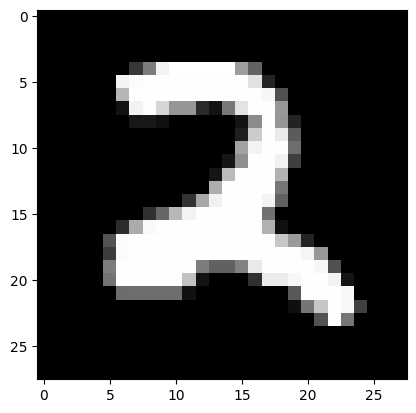

In [50]:
#any number from 0 to 1000 
index=random.randrange(0,X_train.shape[1])

#exctract the image at any random index value
#bcs its an array of 784 element we will reshape it 
plt.imshow(X_train[:,index].reshape(28,28),cmap='gray')
plt.show()

every time it will display a random image

## Implementation of\ the model 

![title](nn.png)

## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## *Repeat Below Steps for many times : *


## Forward Propagation 

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax 

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function 

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 


## Activation functions

In [77]:
def tanh(x):
    return np.tanh(x)

def Relu(x):
    return np.maximum(x,0)

def Softmax(x):
    expX=np.exp(x)
    return expX/np.sum(expX,axis=0)


In [52]:
def derivative_tanh(x):
    return (1 -  np.power(tanh(x), 2))

def derivative_Relu(x):
    #to make the return 0 or 1 not true or false
    return np.array(x>0, dtype=np.float32)

# Initialize Parameters

We need to initialize the **W** parameters randomly, and **B** with zeros

- np.random.randn(a, b) return a numpy array of shape(a, b) with small random values
- For making the values small, we multiply 0.01
- np.zeros((a, b) return a numpy array of shape(a, b) with zeros 

### Why need small weights W?
If we initialize weights will large values, then Z = W * X + B, will be large. For functions like tanh and sigmoid, the slope becomes very less for large Z value, thus learning can be very slow.

#### Remember, we had an increase in the cost function at the beginning while training the model with ReLU activation function?
It is because our weights were still very large and it was creating problem for training our model.

Multiply weights with 0.001 instead of 0.01, and you will see that the graph becomes normal, with a smooth decrease in cost value.

Now, We need to return a dictionary containing all the parameters.


### *I multiplied 0.01 with weights W. But, this is still large, and that is the reason we saw increase in Cost value at the beginning, while training the model with ReLU function.*

### *So, instead, you can multiply with 0.001, and it will solve the problem.*

- **n_x :**  nbr of neurons in the input layer
- **n_h :**  nbr of neurons in the hideen layer
- **n_y :**  nbr of neurons in the output layer

In [89]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.001
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.001
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## Forward Propagation 

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $


In [90]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1,x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = Softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

## Cost Function 

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$


In [91]:
def cost_function(a2,y):
    #total nbr of observation
    m=y.shape[1]
    cost=-(1/m)*np.sum(y*np.log(a2))
    return cost

## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

In [92]:
def backward_propagation(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 

In [93]:
def updating_parametres(parameters,gradients,learning_rate):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    dw1=gradients['dw1']
    db1=gradients['db1']
    dw2=gradients['dw2']
    db2=gradients['db2']
    
    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    w2=w2-learning_rate*dw2
    b2=b2-learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

    
    

# Complete Model

In [94]:
def Model(x,y,n_h,learning_rate,iterations):
    n_x=x.shape[0]
    n_y=y.shape[0]
    
    parameters=initialize_parameters(n_x,n_h,n_y)
    cost_list=[]
    for i in range(iterations):
        forward_cache=forward_propagation(x,parameters)
        cost= cost_function(forward_cache['a2'],y)
        gradients=backward_propagation(x,y,parameters,forward_cache)
        parameters=updating_parametres(parameters,gradients,learning_rate)
        cost_list.append(cost)
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list
    

In [95]:
iterations = 100
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = Model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.308124611222332
Cost after 10 iterations is : 1.2823035370239764
Cost after 20 iterations is : 0.8881497895826066
Cost after 30 iterations is : 0.6957936879548396
Cost after 40 iterations is : 0.5821403061573658
Cost after 50 iterations is : 0.5058690587944032
Cost after 60 iterations is : 0.4501550602011337
Cost after 70 iterations is : 0.40699519818488616
Cost after 80 iterations is : 0.3721153487376469
Cost after 90 iterations is : 0.3430273444897963


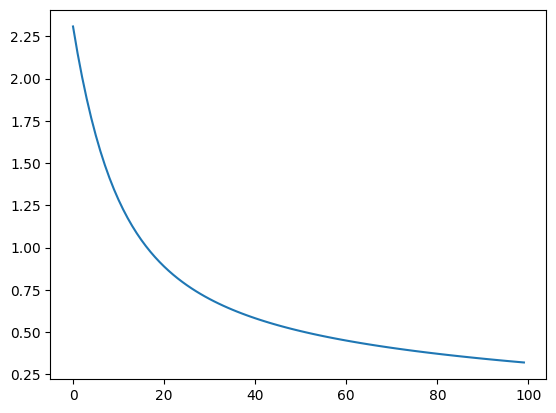

In [96]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [98]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    #the index with the highest proba + the proba
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [99]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 94.1 %
Accuracy of Test Dataset 86.0 %


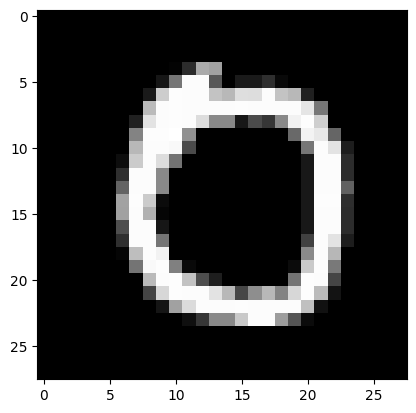

Our model says it is : 0


In [108]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])